In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree,export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Classification

#### Load data

In [ ]:
wine = datasets.load_wine()

In [ ]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
print(wine.DESCR,'\n')

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
data=pd.DataFrame(wine.data,columns=wine.feature_names)
target=wine.target

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,"1,065.00"
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,"1,050.00"
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,"1,185.00"
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,"1,480.00"
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00


In [ ]:
target[:5]

array([0, 0, 0, 0, 0])

#### Explore Data

In [ ]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
data.shape

(178, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.00,13.00,0.81,11.03,12.36,13.05,13.68,14.83
malic_acid,178.00,2.34,1.12,0.74,1.60,1.87,3.08,5.80
ash,178.00,2.37,0.27,1.36,2.21,2.36,2.56,3.23
alcalinity_of_ash,178.00,19.49,3.34,10.60,17.20,19.50,21.50,30.00
magnesium,178.00,99.74,14.28,70.00,88.00,98.00,107.00,162.00
total_phenols,178.00,2.30,0.63,0.98,1.74,2.35,2.80,3.88
flavanoids,178.00,2.03,1.00,0.34,1.21,2.13,2.88,5.08
nonflavanoid_phenols,178.00,0.36,0.12,0.13,0.27,0.34,0.44,0.66
proanthocyanins,178.00,1.59,0.57,0.41,1.25,1.56,1.95,3.58
color_intensity,178.00,5.06,2.32,1.28,3.22,4.69,6.20,13.00


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

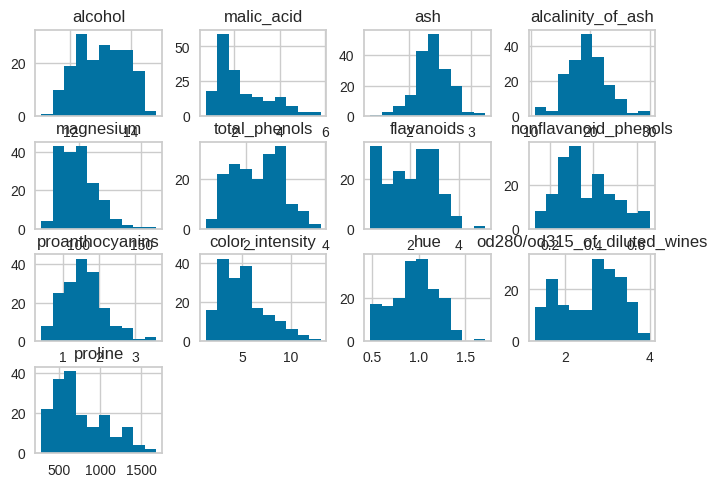

In [ ]:
data.hist()

In [ ]:
len(target)

178

In [ ]:
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

#### Preprocess data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_test.shape

(54, 13)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([41, 50, 33]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([18, 21, 15]))

In [ ]:
y_test[:5]

array([2, 0, 1, 2, 1])

#### Model

clf1: Bagging

In [ ]:
clf1=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,ccp_alpha=0.02),n_estimators=20, random_state=0)

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 =clf1.predict(X_test)

In [ ]:
clf1.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=3)

In [ ]:
len(clf1.estimators_)

20

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.90      0.95        21
     class_2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54
 

Accuracy on train:   1.0 

Accuracy on test:  0.963 



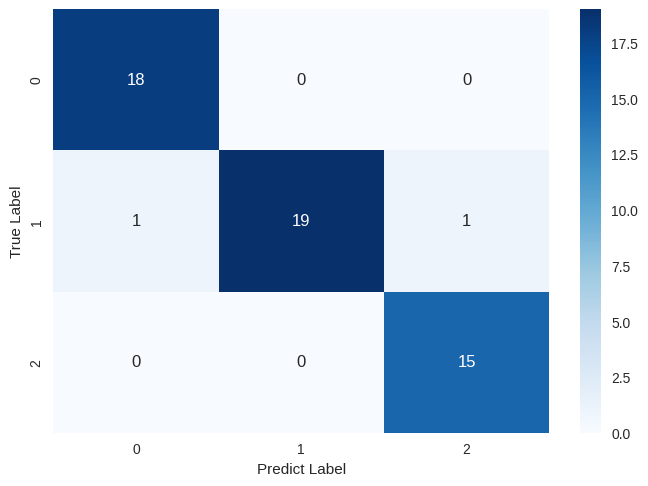

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred1,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",clf1.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",clf1.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred1).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

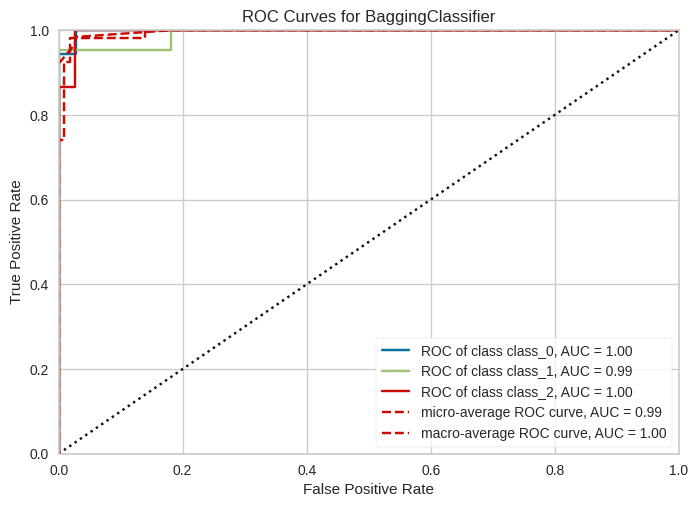

<Axes: title={'center': 'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf1, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

[Text(0.4444444444444444, 0.875, 'alcohol <= 12.795\ngini = 0.626\nsamples = 75\nvalue = [36, 61, 27]'),
 Text(0.2222222222222222, 0.625, 'flavanoids <= 0.795\ngini = 0.198\nsamples = 34\nvalue = [0, 56, 7]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 56, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.49\ngini = 0.537\nsamples = 41\nvalue = [36, 5, 20]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 20]'),
 Text(0.7777777777777778, 0.375, 'magnesium <= 87.5\ngini = 0.214\nsamples = 28\nvalue = [36, 5, 0]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 5, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [36, 0, 0]')]

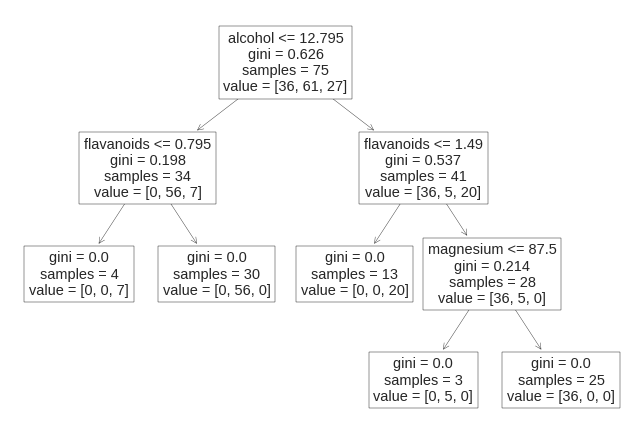

In [ ]:
plot_tree(clf1.estimators_[0],feature_names=X_test.columns)

[Text(0.3333333333333333, 0.875, 'color_intensity <= 3.945\ngini = 0.657\nsamples = 76\nvalue = [38, 51, 35]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.081\nsamples = 32\nvalue = [1, 46, 1]'),
 Text(0.5, 0.625, 'flavanoids <= 1.4\ngini = 0.559\nsamples = 44\nvalue = [37, 5, 34]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 34]'),
 Text(0.6666666666666666, 0.375, 'proline <= 670.0\ngini = 0.21\nsamples = 25\nvalue = [37, 5, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 5, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [37, 0, 0]')]

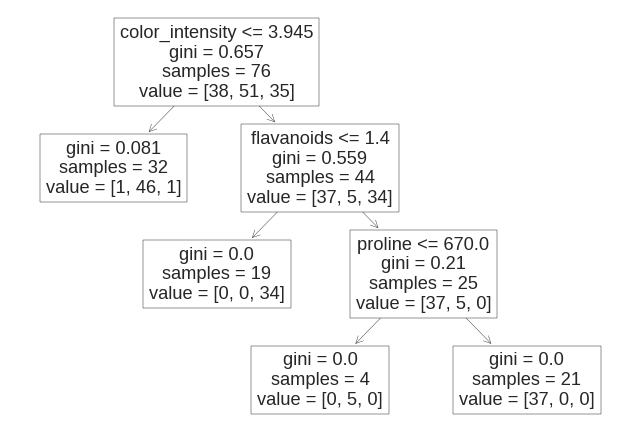

In [ ]:
plot_tree(clf1.estimators_[10],feature_names=X_test.columns)

clf2: Random Forest (subsamples, best split)

In [ ]:
clf2=RandomForestClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.02,max_features='log2',n_estimators=20, random_state=0)

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 =clf2.predict(X_test)

In [ ]:
clf2.base_estimator_

DecisionTreeClassifier()

In [ ]:
clf2.estimators_

[DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=209652396),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=398764591),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=924231285),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=1478610112),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=441365315),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=1537364731),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=19

In [ ]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
clf2.feature_importances_

array([0.16853387, 0.04479953, 0.01313432, 0.01627801, 0.0152986 ,
       0.0533903 , 0.31245699, 0.00841831, 0.02431854, 0.07148039,
       0.01841088, 0.07636206, 0.17711821])

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54
 

Accuracy on train:   1.0 

Accuracy on test:  0.981 



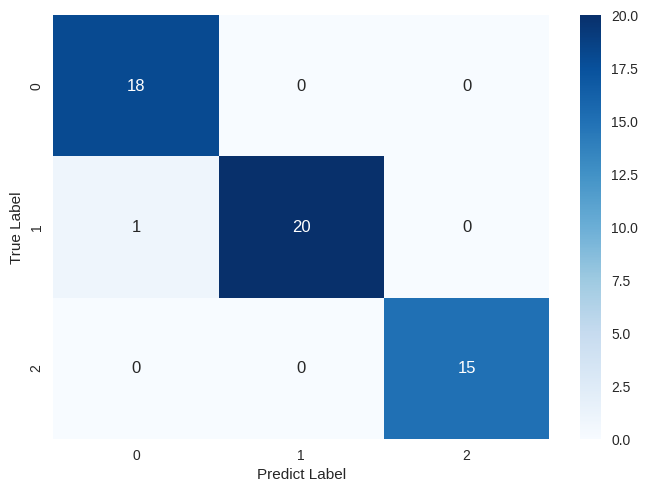

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred2,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",clf2.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",clf2.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred2).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

[Text(0.4444444444444444, 0.9, 'flavanoids <= 1.425\nentropy = 1.5\nsamples = 75\nvalue = [36, 61, 27]'),
 Text(0.2222222222222222, 0.7, 'alcohol <= 12.125\nentropy = 0.734\nsamples = 22\nvalue = [0, 7, 27]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 5, 0]'),
 Text(0.3333333333333333, 0.5, 'color_intensity <= 3.625\nentropy = 0.362\nsamples = 19\nvalue = [0, 2, 27]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 27]'),
 Text(0.6666666666666666, 0.7, 'alcohol <= 12.825\nentropy = 0.971\nsamples = 53\nvalue = [36, 54, 0]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 25\nvalue = [0, 49, 0]'),
 Text(0.7777777777777778, 0.5, 'alcohol <= 13.175\nentropy = 0.535\nsamples = 28\nvalue = [36, 5, 0]'),
 Text(0.6666666666666666, 0.3, 'ash <= 2.485\nentropy = 1.0\nsamples = 6\nvalue = [5, 5, 0]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.65\

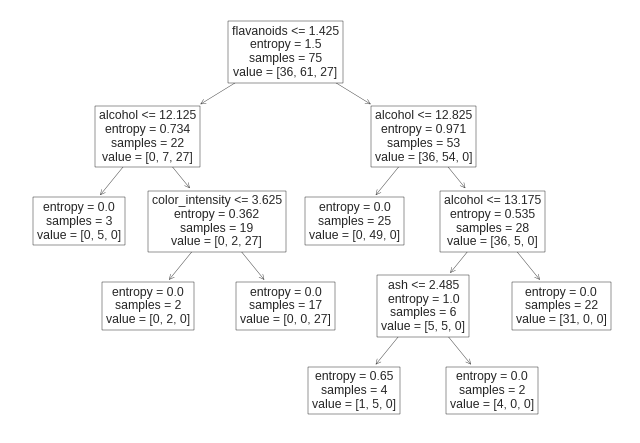

In [ ]:
plot_tree(clf2.estimators_[0],feature_names=X_test.columns)

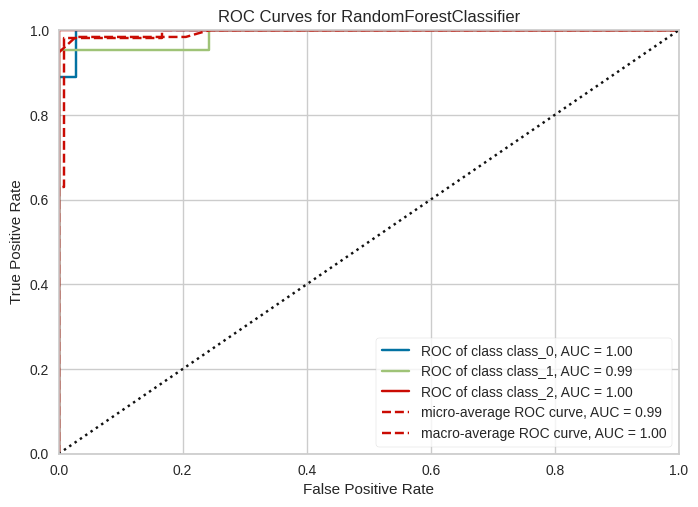

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf2, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

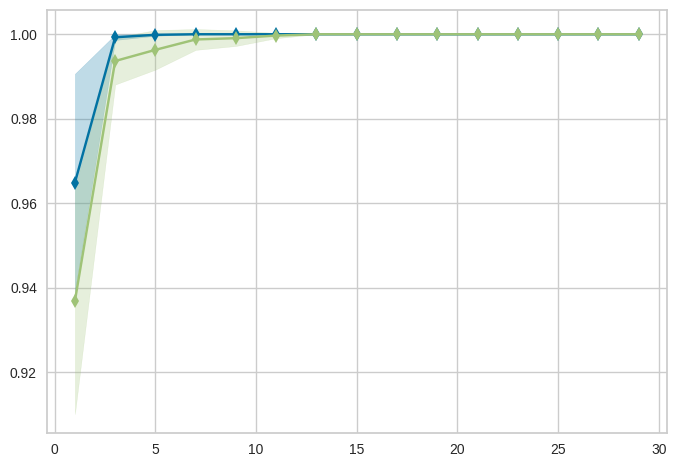

In [ ]:
param_range = np.arange(1, 30, 2)
visualizer = ValidationCurve(
    RandomForestClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.02,max_features='log2',random_state=0) ,param_name="n_estimators",
    param_range=param_range, cv=StratifiedKFold(5), scoring='roc_auc_ovr'
)
visualizer.fit(X_train, y_train)
plt.show()


clf3: Extra Tree: whole samples: random split

In [ ]:
clf3=ExtraTreesClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.02,max_features='log2',n_estimators=25, random_state=0)

#Train the model using the training sets
clf3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred3 =clf3.predict(X_test)

In [ ]:
clf3.estimators_

[ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=209652396),
 ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=398764591),
 ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=924231285),
 ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=1478610112),
 ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=441365315),
 ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=1537364731),
 ExtraTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', random_state=192771779),
 ExtraTreeClassifier(ccp_alpha=0

In [ ]:
clf3.decision_path

<bound method BaseForest.decision_path of ExtraTreesClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=4,
                     max_features='log2', n_estimators=25, random_state=0)>

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54
 

Accuracy on train:   1.0 

Accuracy on test:  0.981 



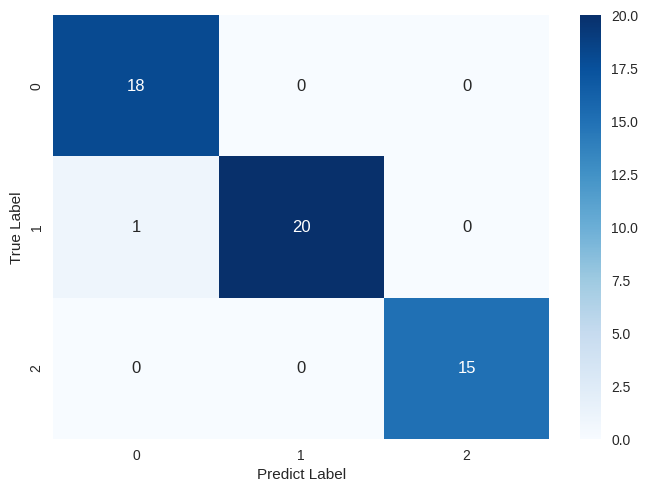

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred3,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",clf3.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",clf3.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred3).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

[Text(0.65, 0.9, 'hue <= 1.177\nentropy = 1.565\nsamples = 124\nvalue = [41, 50, 33]'),
 Text(0.4, 0.7, 'hue <= 1.021\nentropy = 1.582\nsamples = 105\nvalue = [34, 38, 33]'),
 Text(0.2, 0.5, 'alcohol <= 12.708\nentropy = 1.526\nsamples = 74\nvalue = [16, 25, 33]'),
 Text(0.1, 0.3, 'od280/od315_of_diluted_wines <= 2.423\nentropy = 0.894\nsamples = 29\nvalue = [0, 20, 9]'),
 Text(0.05, 0.1, 'entropy = 0.89\nsamples = 13\nvalue = [0, 4, 9]'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16, 0]'),
 Text(0.3, 0.3, 'proline <= 1054.134\nentropy = 1.366\nsamples = 45\nvalue = [16, 5, 24]'),
 Text(0.25, 0.1, 'entropy = 1.245\nsamples = 36\nvalue = [7, 5, 24]'),
 Text(0.35, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.6, 0.5, 'od280/od315_of_diluted_wines <= 3.523\nentropy = 0.981\nsamples = 31\nvalue = [18, 13, 0]'),
 Text(0.5, 0.3, 'alcohol <= 13.136\nentropy = 0.999\nsamples = 25\nvalue = [13, 12, 0]'),
 Text(0.45, 0.1, 'entropy = 0.811\nsamples = 16\nvalue = 

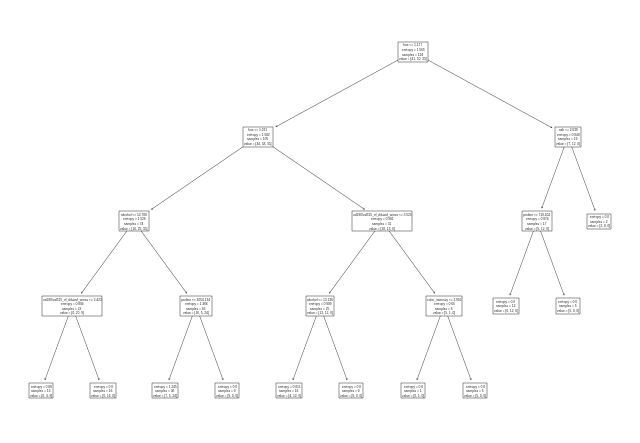

In [ ]:
plot_tree(clf3.estimators_[2],feature_names=X_test.columns)

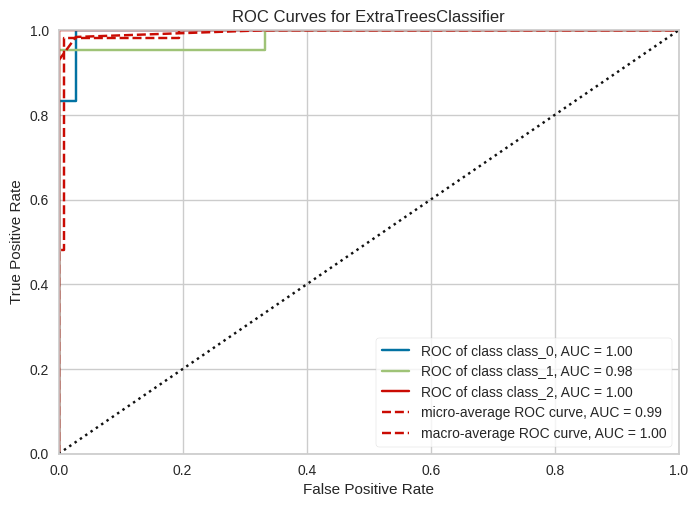

<Axes: title={'center': 'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf3, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

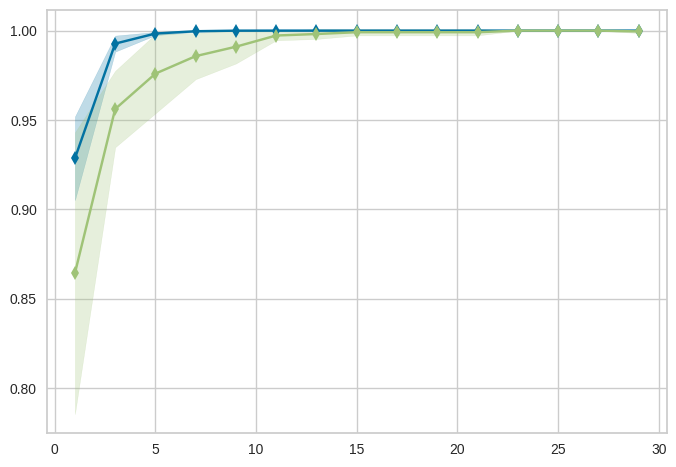

In [ ]:
param_range = np.arange(1, 30, 2)
visualizer = ValidationCurve(
    ExtraTreesClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.02,max_features='log2',random_state=0) ,param_name="n_estimators",
    param_range=param_range, cv=StratifiedKFold(5), scoring='roc_auc_ovr'
)
visualizer.fit(X_train, y_train)
plt.show()

clf4: Adaboost

In [ ]:
clf4=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=2,ccp_alpha=0.02,max_features='log2'),n_estimators=3,learning_rate=1, random_state=0)

#Train the model using the training sets
clf4.fit(X_train, y_train)

#Predict the response for test dataset
y_pred4 =clf4.predict(X_test)

In [ ]:
clf4.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=2,
                       max_features='log2')

In [ ]:
clf4.estimators_

[DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=2,
                        max_features='log2', random_state=209652396),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=2,
                        max_features='log2', random_state=398764591),
 DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=2,
                        max_features='log2', random_state=924231285)]

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.86      0.90      0.88        21
     class_2       0.92      0.80      0.86        15

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54
 

Accuracy on train:   0.976 

Accuracy on test:  0.907 



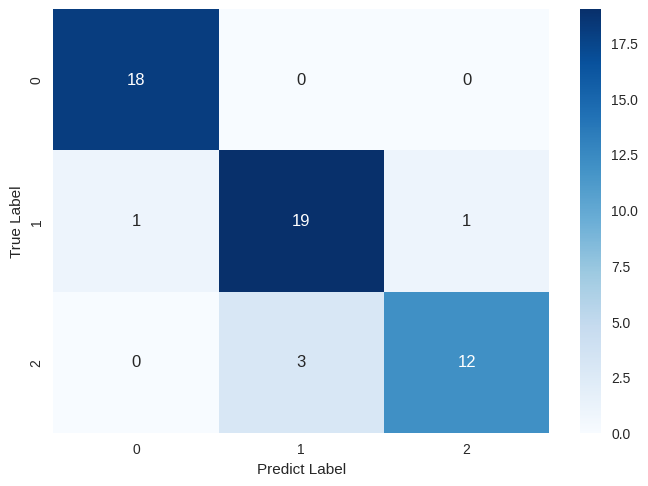

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred4,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",clf4.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",clf4.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred4).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

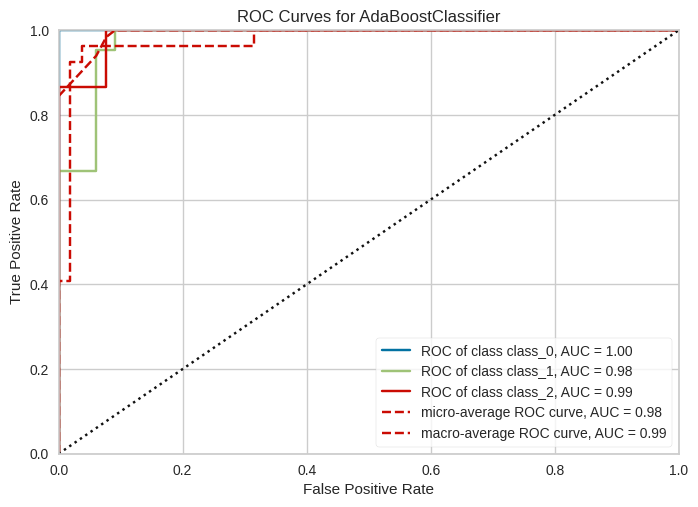

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf4, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

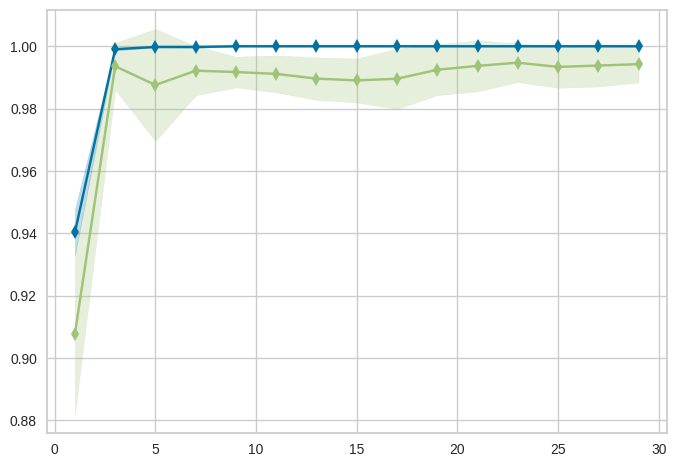

In [ ]:
param_range = np.arange(1, 30, 2)
visualizer = ValidationCurve(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=2,ccp_alpha=0.02,max_features='log2'),learning_rate=1, random_state=0) ,param_name="n_estimators",
    param_range=param_range, cv=StratifiedKFold(5), scoring='roc_auc_ovr'
)
visualizer.fit(X_train, y_train)
plt.show()

clf5: Gradient Boost

In [ ]:
clf5=GradientBoostingClassifier(n_estimators=3, learning_rate=1,max_depth=1,ccp_alpha=0.02,random_state=0)

#Train the model using the training sets
clf5.fit(X_train, y_train)

#Predict the response for test dataset
y_pred5 =clf5.predict(X_test)

In [ ]:
clf5.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.02, criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0x785BC10A6640)  ,
        DecisionTreeRegressor(ccp_alpha=0.02, criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0x785BC10A6640)  ,
        DecisionTreeRegressor(ccp_alpha=0.02, criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0x785BC10A6640)  ],
       [DecisionTreeRegressor(ccp_alpha=0.02, criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0x785BC10A6640)  ,
        DecisionTreeRegressor(ccp_alpha=0.02, criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19937) at 0x785BC10A6640)  ,
        DecisionTreeRegressor(ccp_alpha=0.02, criterion='friedman_mse', max_depth=1,
                              random_state=RandomState(MT19

Classification Report: 
               precision    recall  f1-score   support

     class_0       1.00      0.83      0.91        18
     class_1       0.81      1.00      0.89        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.91        54
   macro avg       0.94      0.90      0.91        54
weighted avg       0.93      0.91      0.91        54
 

Accuracy on train:   0.944 

Accuracy on test:  0.907 



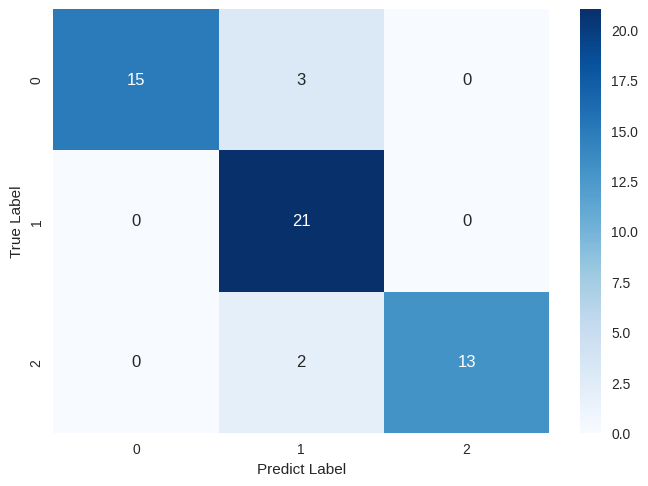

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred5,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",clf5.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",clf5.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred5).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

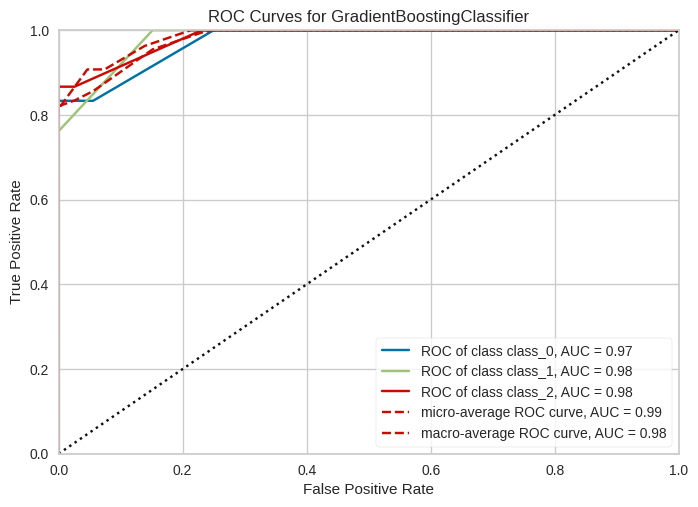

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf5, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

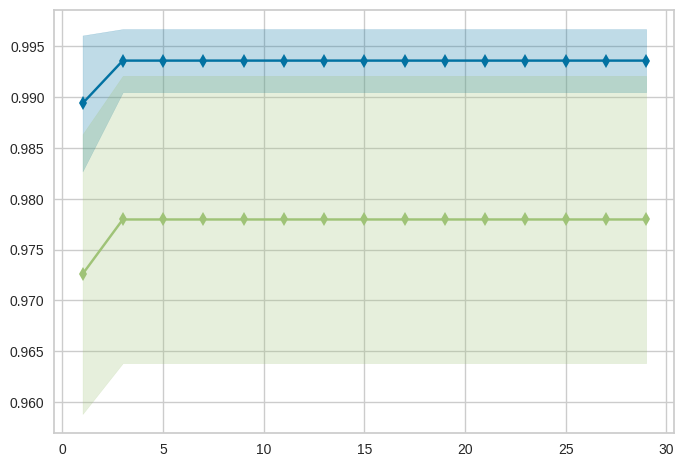

In [ ]:
param_range = np.arange(1, 30, 2)
visualizer = ValidationCurve(
    GradientBoostingClassifier(learning_rate=1,max_depth=1,ccp_alpha=0.02,random_state=0) ,param_name="n_estimators",
    param_range=param_range, cv=StratifiedKFold(5), scoring='roc_auc_ovr'
)
visualizer.fit(X_train, y_train)
plt.show()

clf6: Voting

In [ ]:
vote1 = LogisticRegression(multi_class='multinomial', random_state=1)
vote2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,ccp_alpha=0.05,max_features='log2',random_state=1)
vote3 = GaussianNB()
vote4 = KNeighborsClassifier(n_neighbors=3)

clf6=VotingClassifier(estimators=[ ('lr', vote1), ('st', vote2), ('gnb', vote3),('knn',vote4)], voting='hard', \
    weights=None, n_jobs=None, flatten_transform=True, verbose=False)

#Train the model using the training sets
clf6.fit(X_train, y_train)

#Predict the response for test dataset
y_pred6 =clf6.predict(X_test)

In [ ]:
clf6.estimators_

[LogisticRegression(multi_class='multinomial', random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=4,
                        max_features='log2', random_state=1),
 GaussianNB(),
 KNeighborsClassifier(n_neighbors=3)]

In [ ]:
clf6.named_estimators_.lr.coef_

array([[-1.49074577e-01,  1.36785910e-01,  1.28391626e-01,
        -2.69239682e-01,  4.52213307e-03,  2.53225784e-01,
         4.75956949e-01, -3.62158007e-02,  8.68319221e-02,
        -1.12036774e-01, -3.21562918e-03,  3.31793546e-01,
         6.49033795e-03],
       [ 3.93927360e-01, -7.23130775e-01, -1.27716588e-01,
         1.35461507e-01,  3.71158557e-02,  1.54456050e-01,
         3.32178582e-01,  3.84616836e-02,  2.42068938e-01,
        -1.15948035e+00,  2.07687910e-01,  3.31489942e-01,
        -8.37744129e-03],
       [-2.44852783e-01,  5.86344864e-01, -6.75037664e-04,
         1.33778174e-01, -4.16379888e-02, -4.07681833e-01,
        -8.08135531e-01, -2.24588296e-03, -3.28900860e-01,
         1.27151713e+00, -2.04472280e-01, -6.63283488e-01,
         1.88710334e-03]])

In [ ]:
clf6.named_estimators_.lr.intercept_

array([-0.03791213,  0.07551978, -0.03760765])

In [ ]:
print(export_text(clf6.named_estimators_.st,feature_names=X_test.columns.tolist()))

|--- flavanoids <= 1.40
|   |--- alcalinity_of_ash <= 17.25
|   |   |--- class: 1
|   |--- alcalinity_of_ash >  17.25
|   |   |--- color_intensity <= 3.72
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.72
|   |   |   |--- class: 2
|--- flavanoids >  1.40
|   |--- ash <= 2.03
|   |   |--- class: 1
|   |--- ash >  2.03
|   |   |--- od280/od315_of_diluted_wines <= 2.48
|   |   |   |--- class: 1
|   |   |--- od280/od315_of_diluted_wines >  2.48
|   |   |   |--- alcohol <= 12.83
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  12.83
|   |   |   |   |--- class: 0



[Text(0.4, 0.9, 'flavanoids <= 1.4\nentropy = 1.565\nsamples = 124\nvalue = [41, 50, 33]\nclass = class_1'),
 Text(0.2, 0.7, 'alcalinity_of_ash <= 17.25\nentropy = 0.669\nsamples = 40\nvalue = [0, 7, 33]\nclass = class_2'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = class_1'),
 Text(0.3, 0.5, 'color_intensity <= 3.725\nentropy = 0.494\nsamples = 37\nvalue = [0, 4, 33]\nclass = class_2'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = class_1'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = class_2'),
 Text(0.6, 0.7, 'ash <= 2.03\nentropy = 1.0\nsamples = 84\nvalue = [41, 43, 0]\nclass = class_1'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]\nclass = class_1'),
 Text(0.7, 0.5, 'od280/od315_of_diluted_wines <= 2.475\nentropy = 0.986\nsamples = 72\nvalue = [41, 31, 0]\nclass = class_0'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0]\nclass = class_1'),
 Text(0.8, 0.3, 'a

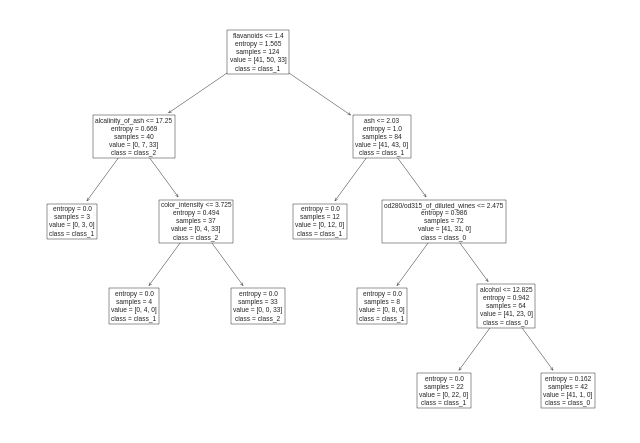

In [ ]:
plot_tree(clf6.named_estimators_.st,feature_names=X_test.columns,class_names=wine.target_names)

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54
 

Accuracy on train:   1.0 

Accuracy on test:  0.981 



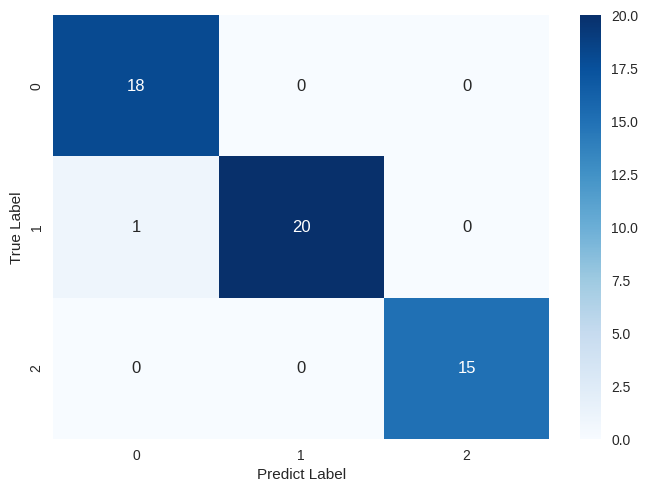

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test,y_pred6,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",clf6.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",clf6.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred6).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

### Regression

In [ ]:
X1=pd.DataFrame(datasets.fetch_california_housing().data,columns=datasets.fetch_california_housing().feature_names)
y1=datasets.fetch_california_housing().target

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,shuffle=True,random_state=100)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X1_train)
X1_train=pd.DataFrame(imp.transform(X1_train),columns=X1.columns)
X1_test=pd.DataFrame(imp.transform(X1_test),columns=X1.columns)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

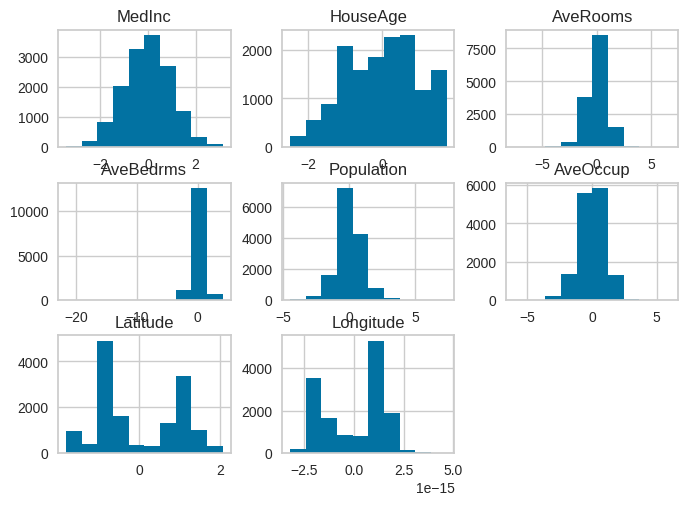

In [ ]:
scaler=preprocessing.PowerTransformer()
scaler.fit(X1_train)
X1_train=pd.DataFrame(scaler.transform(X1_train),columns=X1.columns)
X1_test=pd.DataFrame(scaler.transform(X1_test),columns=X1.columns)
X1_train.hist()

reg1: Bagging

In [ ]:
reg1=BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10, random_state=0)

#Train the model using the training sets
reg1.fit(X1_train, y1_train)


BaggingRegressor(base_estimator=LinearRegression(), random_state=0)

In [ ]:
y1_train_pred1=pd.DataFrame(reg1.predict(X1_train))
y1_test_pred1=pd.DataFrame(reg1.predict(X1_test))
print('mae :',metrics.mean_absolute_error(y1_test, y1_test_pred1))
print('mse :',metrics.mean_squared_error(y1_test, y1_test_pred1))
print('mape :',metrics.mean_absolute_percentage_error(y1_test, y1_test_pred1))
print('r2 :',metrics.r2_score(y1_test, y1_test_pred1))
print('Adjusted r2 :',1-(1-metrics.r2_score(y1_test, y1_test_pred1))*(len(X1_test)-1)/(len(X1_test)-8-1))

mae : 0.5290885716306366
mse : 0.48588553166964243
mape : 0.32401649639889996
r2 : 0.6331432598377748
Adjusted r2 : 0.6326685948011748


In [ ]:
reg1.estimators_

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

reg2: Ramdom Forerest

In [ ]:
reg2=RandomForestRegressor(max_depth=4,ccp_alpha=0.01,n_estimators=10, random_state=0)

#Train the model using the training sets
reg2.fit(X1_train, y1_train)


RandomForestRegressor(ccp_alpha=0.01, max_depth=4, n_estimators=10,
                      random_state=0)

In [ ]:
y1_train_pred2=pd.DataFrame(reg2.predict(X1_train))
y1_test_pred2=pd.DataFrame(reg2.predict(X1_test))
print('mae :',metrics.mean_absolute_error(y1_test, y1_test_pred2))
print('mse :',metrics.mean_squared_error(y1_test, y1_test_pred2))
print('mape :',metrics.mean_absolute_percentage_error(y1_test, y1_test_pred2))
print('r2 :',metrics.r2_score(y1_test, y1_test_pred2))
print('Adjusted r2 :',1-(1-metrics.r2_score(y1_test, y1_test_pred2))*(len(X1_test)-1)/(len(X1_test)-8-1))

mae : 0.5464738132625335
mse : 0.5328090949880823
mape : 0.3465123959701969
r2 : 0.5977146982655757
Adjusted r2 : 0.5971941932657576


reg3: Extra Tree

In [ ]:
reg3=ExtraTreesRegressor(max_depth=4,ccp_alpha=0.01,n_estimators=10, random_state=0)

#Train the model using the training sets
reg3.fit(X1_train, y1_train)


ExtraTreesRegressor(ccp_alpha=0.01, max_depth=4, n_estimators=10,
                    random_state=0)

In [ ]:
y1_train_pred3=pd.DataFrame(reg3.predict(X1_train))
y1_test_pred3=pd.DataFrame(reg3.predict(X1_test))
print('mae :',metrics.mean_absolute_error(y1_test, y1_test_pred3))
print('mse :',metrics.mean_squared_error(y1_test, y1_test_pred3))
print('mape :',metrics.mean_absolute_percentage_error(y1_test, y1_test_pred3))
print('r2 :',metrics.r2_score(y1_test, y1_test_pred3))
print('Adjusted r2 :',1-(1-metrics.r2_score(y1_test, y1_test_pred3))*(len(X1_test)-1)/(len(X1_test)-8-1))

mae : 0.614822400542646
mse : 0.6351049367539532
mape : 0.41092875224583436
r2 : 0.5204785663037501
Adjusted r2 : 0.5198581277675105


reg4: Adaboost

In [ ]:
reg4=AdaBoostRegressor(estimator=None,n_estimators=7,learning_rate=1, random_state=0)

#Train the model using the training sets
reg4.fit(X1_train, y1_train)

AdaBoostRegressor(learning_rate=1, n_estimators=7, random_state=0)

In [ ]:
y1_train_pred4=pd.DataFrame(reg4.predict(X1_train))
y1_test_pred4=pd.DataFrame(reg4.predict(X1_test))
print('mae :',metrics.mean_absolute_error(y1_test, y1_test_pred4))
print('mse :',metrics.mean_squared_error(y1_test, y1_test_pred4))
print('mape :',metrics.mean_absolute_percentage_error(y1_test, y1_test_pred4))
print('r2 :',metrics.r2_score(y1_test, y1_test_pred4))
print('Adjusted r2 :',1-(1-metrics.r2_score(y1_test, y1_test_pred4))*(len(X1_test)-1)/(len(X1_test)-8-1))

mae : 0.5970292020168322
mse : 0.5635496115335394
mape : 0.4227151995990723
r2 : 0.5745047754427719
Adjusted r2 : 0.5739542398133917


In [ ]:
reg4.estimators_

[DecisionTreeRegressor(max_depth=3, random_state=209652396),
 DecisionTreeRegressor(max_depth=3, random_state=1557691386),
 DecisionTreeRegressor(max_depth=3, random_state=395552086),
 DecisionTreeRegressor(max_depth=3, random_state=1992421770),
 DecisionTreeRegressor(max_depth=3, random_state=1192391147),
 DecisionTreeRegressor(max_depth=3, random_state=1536456818),
 DecisionTreeRegressor(max_depth=3, random_state=1803946386)]

reg5: Gradient Boost

In [ ]:
reg5=GradientBoostingRegressor(n_estimators=10, learning_rate=1,max_depth=3,random_state=0)

#Train the model using the training sets
reg5.fit(X1_train, y1_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=10, random_state=0)

In [ ]:
y1_train_pred5=pd.DataFrame(reg5.predict(X1_train))
y1_test_pred5=pd.DataFrame(reg5.predict(X1_test))
print('mae :',metrics.mean_absolute_error(y1_test, y1_test_pred5))
print('mse :',metrics.mean_squared_error(y1_test, y1_test_pred5))
print('mape :',metrics.mean_absolute_percentage_error(y1_test, y1_test_pred5))
print('r2 :',metrics.r2_score(y1_test, y1_test_pred5))
print('Adjusted r2 :',1-(1-metrics.r2_score(y1_test, y1_test_pred5))*(len(X1_test)-1)/(len(X1_test)-8-1))

mae : 0.4680890371963582
mse : 0.41289431228775514
mape : 0.27890412005571225
r2 : 0.6882536079703697
Adjusted r2 : 0.6878502485758626


In [ ]:
reg5.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA242FF3940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA242FF3940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA242FF3940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA242FF3940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA242FF3940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA242FF3940)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
       

reg6: Voting

In [ ]:
vreg1 = LinearRegression()
vreg2 = SGDRegressor()
vreg3 = DecisionTreeRegressor(max_depth=4,ccp_alpha=0.01,max_features='log2')


reg6=VotingRegressor(estimators=[ ('lr', vreg1), ('sgd', vreg2), ('dt', vreg3)],  \
    weights=None, n_jobs=None, verbose=False)

#Train the model using the training sets
reg6.fit(X1_train, y1_train)


VotingRegressor(estimators=[('lr', LinearRegression()), ('sgd', SGDRegressor()),
                            ('dt',
                             DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4,
                                                   max_features='log2'))])

In [ ]:
y1_train_pred6=pd.DataFrame(reg6.predict(X1_train))
y1_test_pred6=pd.DataFrame(reg6.predict(X1_test))
print('mae :',metrics.mean_absolute_error(y1_test, y1_test_pred6))
print('mse :',metrics.mean_squared_error(y1_test, y1_test_pred6))
print('mape :',metrics.mean_absolute_percentage_error(y1_test, y1_test_pred6))
print('r2 :',metrics.r2_score(y1_test, y1_test_pred6))
print('Adjusted r2 :',1-(1-metrics.r2_score(y1_test, y1_test_pred6))*(len(X1_test)-1)/(len(X1_test)-8-1))

mae : 0.5289181198868267
mse : 0.4990439974725089
mape : 0.32285145032003565
r2 : 0.6232082616636414
Adjusted r2 : 0.6227207420280776
